# Submission By Hritik Dixit 

In [132]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
data = pd.read_csv(r'C:\Users\Hritik\Downloads\StudentsPerformance (1) (1).csv')

In [3]:
print(data.shape)

(1000, 8)


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### comparing males and females in dataset

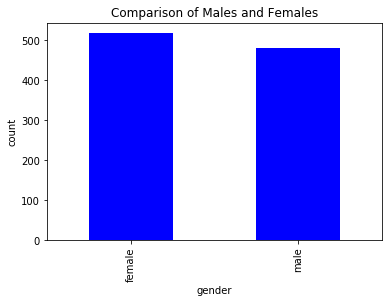

In [11]:
data['gender'].value_counts()
data['gender'].value_counts(dropna = False).plot.bar(color = 'blue')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

From this we can say that number of females students are more than male students

#### comparing groups in dataset


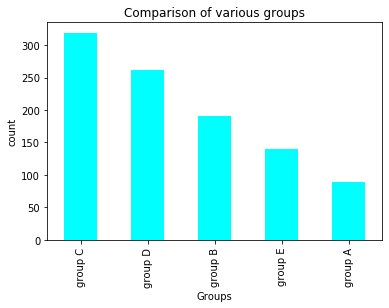

In [15]:
data['race/ethnicity'].value_counts()
data['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of various groups')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

Assumption given that order of Group A > B > C > D > E

In [126]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

From graph and data received we can say that population of group C is highest than other groups and the population of group A which is assumed to be highest order group is lowest

#### comparing parental education level

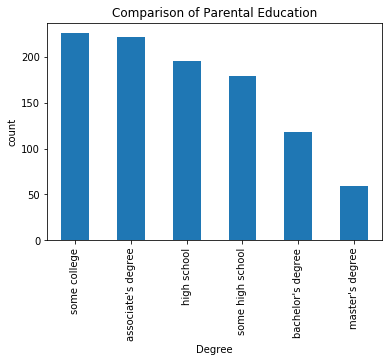

In [19]:
data['parental level of education'].value_counts()
data['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Population of parents who had some higher studies is highest and population of highly educated parents if lowest

#### comparing type of lunch

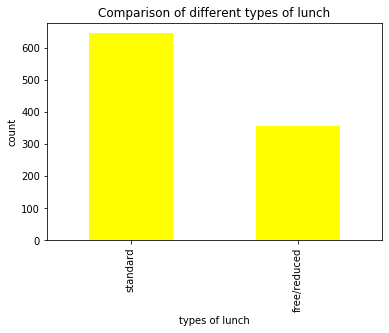

In [20]:
data['lunch'].value_counts()
data['lunch'].value_counts(dropna = False).plot.bar(color = 'yellow')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Population of students with standard type of lunch is higher than free or reduced lunch

#### comparing maths score

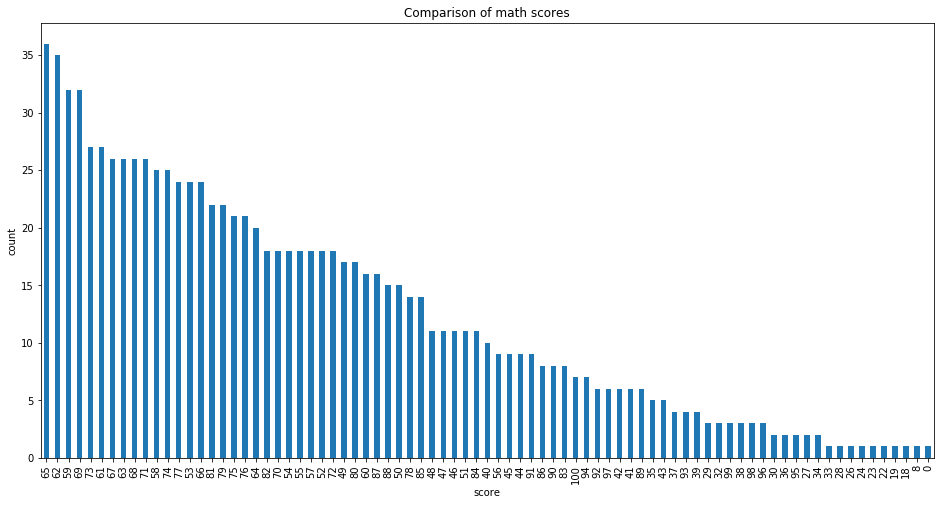

In [24]:
data['math score'].value_counts()
data['math score'].value_counts(dropna = False).plot.bar(figsize = (16, 8))
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

#### comparing reading score

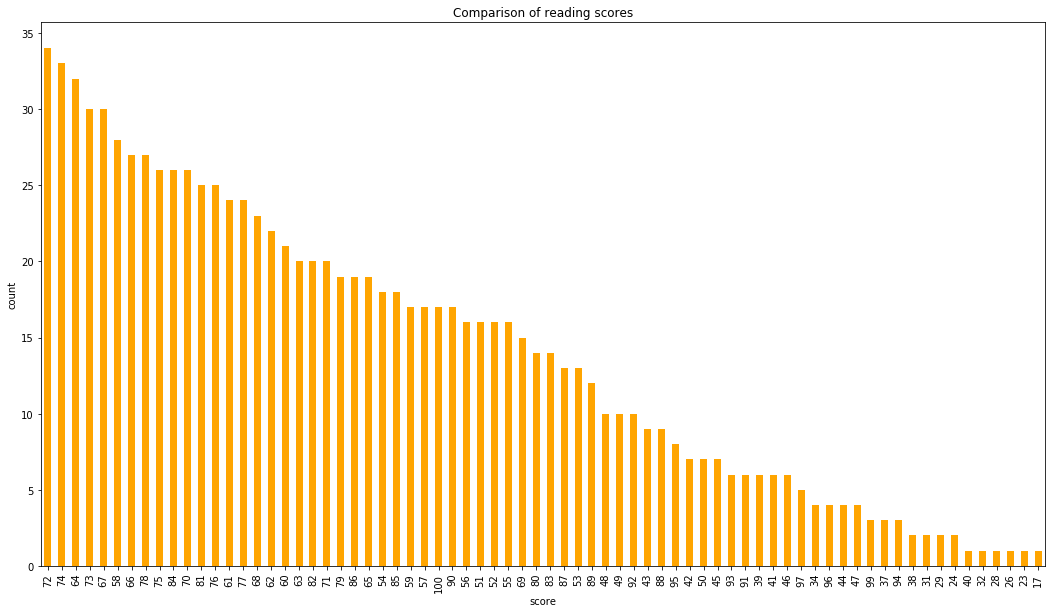

In [48]:
data['reading score'].value_counts(normalize = True)
data['reading score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'orange')
plt.title('Comparison of reading scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

#### comparing writing score

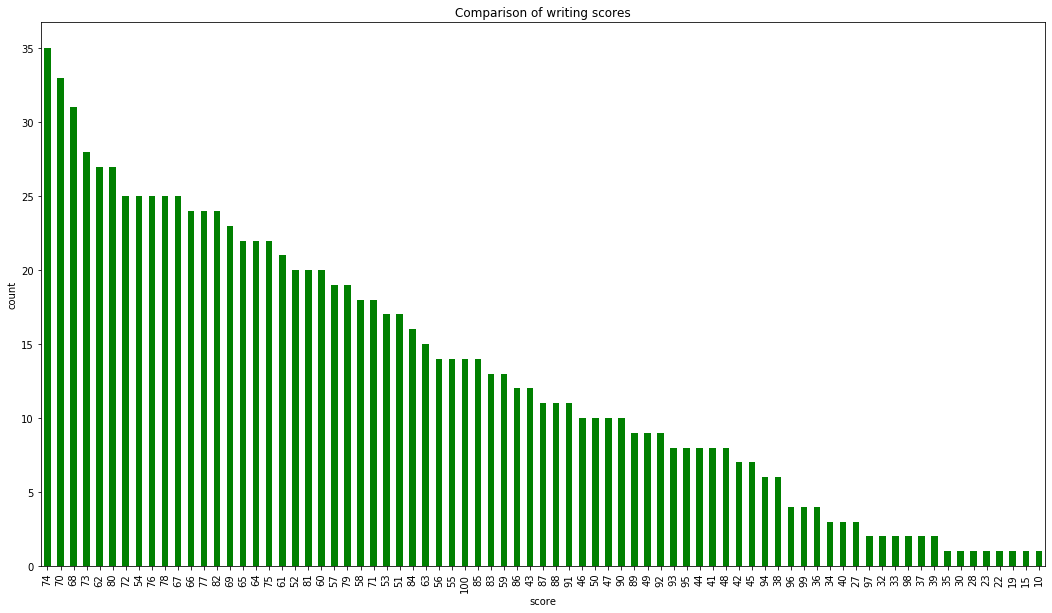

In [127]:
data['writing score'].value_counts(normalize = True)
data['writing score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'green')
plt.title('Comparison of writing scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

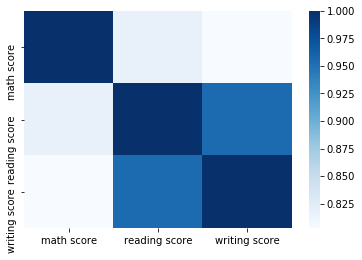

In [83]:
# Score distribution heatmap

sns.heatmap(data.corr(), cmap="Blues")

We can say that scores have high frequency around 50 to 80 and frequency of maths scores if lesser and comparison to the two scores. Moreover mean of scores lies around 67 or between 66 and 69 

In [95]:
def box(df,col,hue=None, fsize = (14,5), sort_order = True, ptype = None):
    
    fig, ax = plt.subplots(1,3, figsize=fsize)   
    fig.suptitle('Comparison of scores by '+col, weight="bold")    
    score_cols = data.select_dtypes("number").columns  
    order = df[col].value_counts().index.sort_values() if sort_order else None  
    
    for i in range(3):
        sns.boxplot(x=col, y=score_cols[i],hue=hue,data = df, ax= ax[i], order=order) #boxplot        
        ax[i].tick_params(labelrotation=90) 
        ax[i].set_title(score_cols[i], weight="medium")

## By Gender

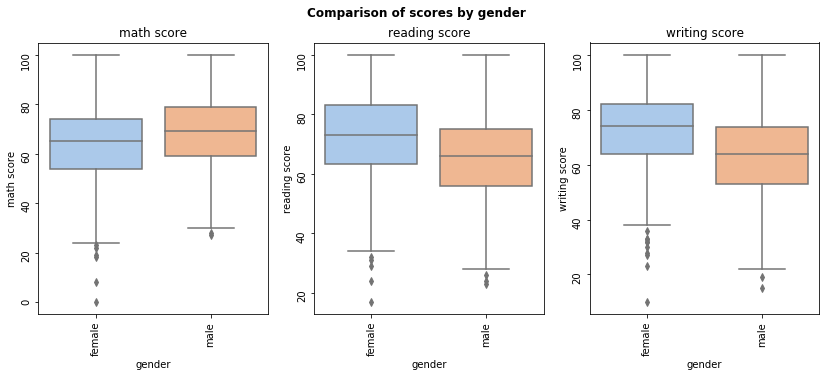

In [96]:
box(data,"gender" )

#### comparison of maths score and gender

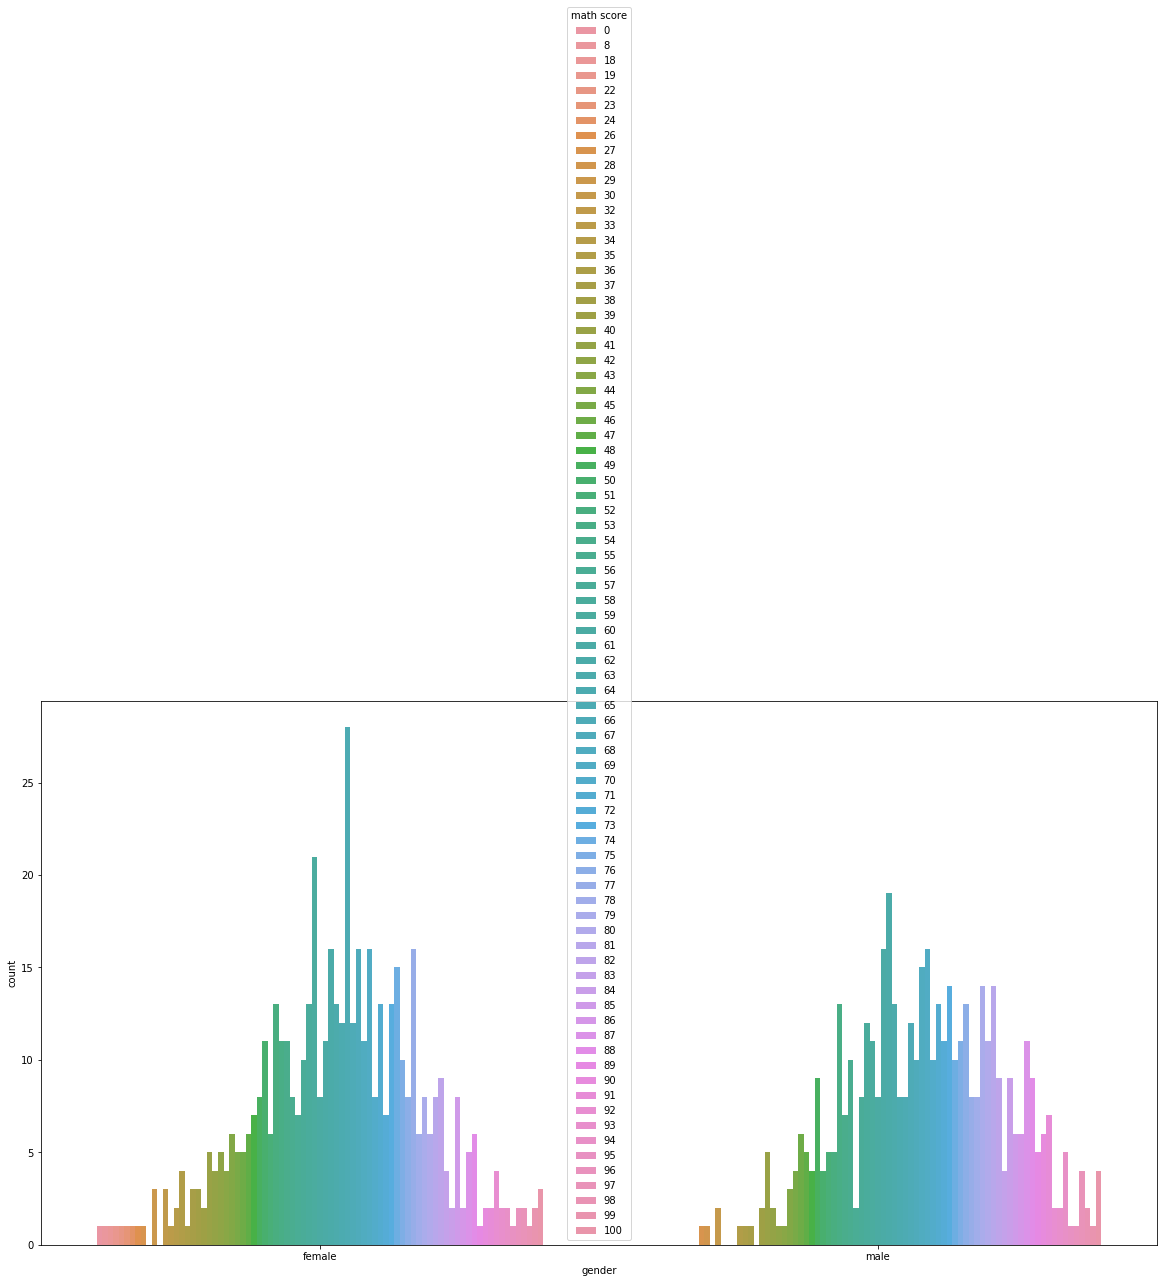

In [101]:
sns.countplot(x = 'gender', data = data,  hue = 'math score')
plt.show()

#### comparison between writing score and gender

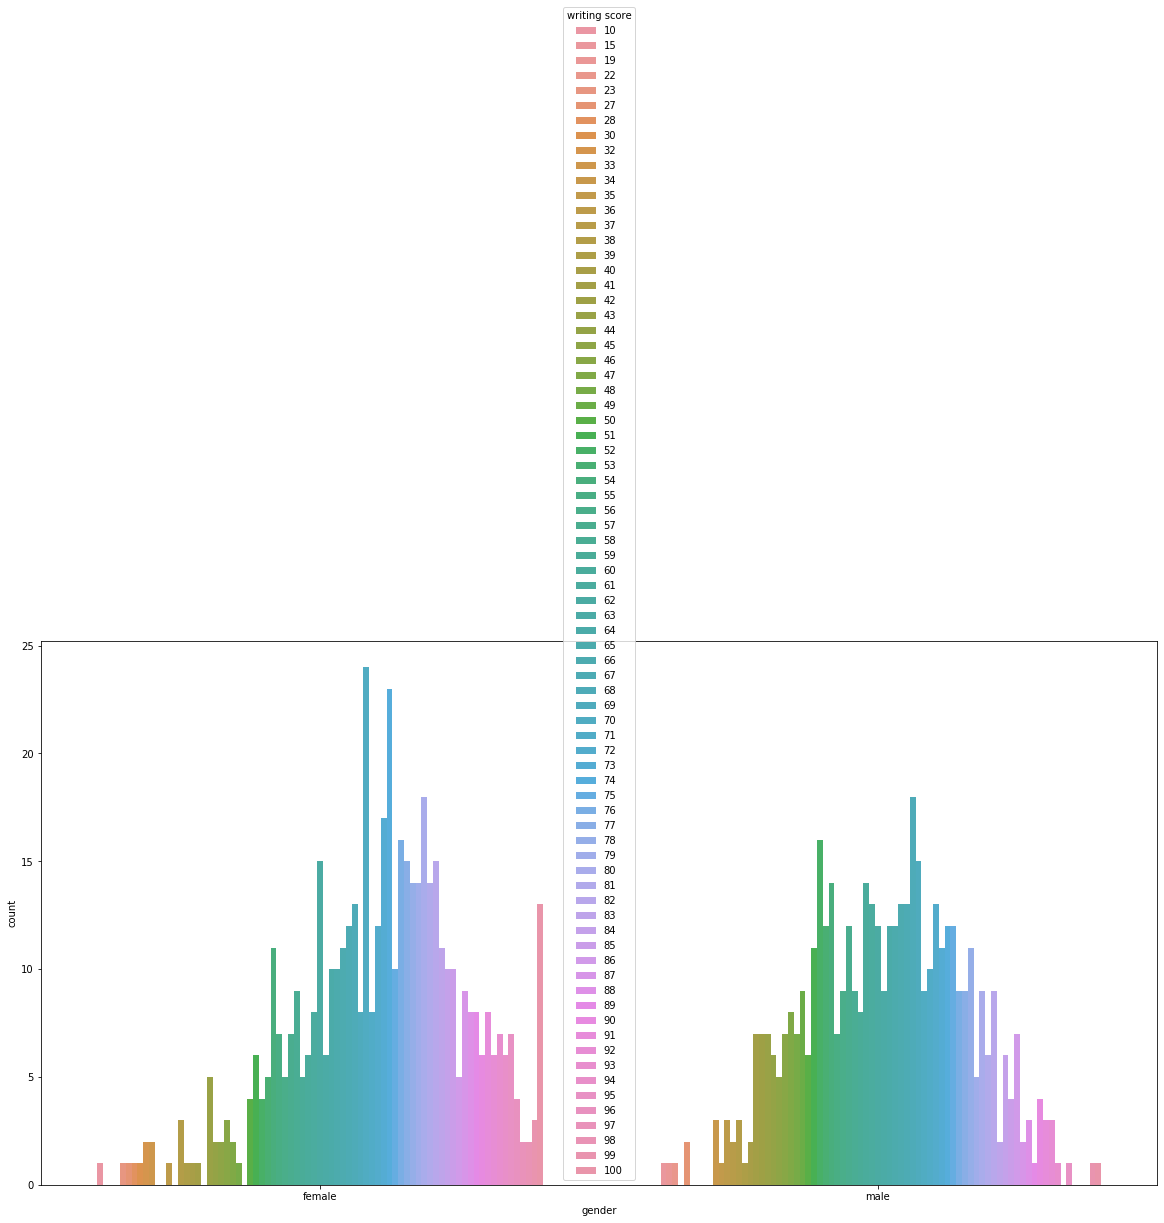

In [102]:
sns.countplot(x = 'gender', data = data,  hue = 'writing score')
plt.show()

#### comparison between reading score and gender

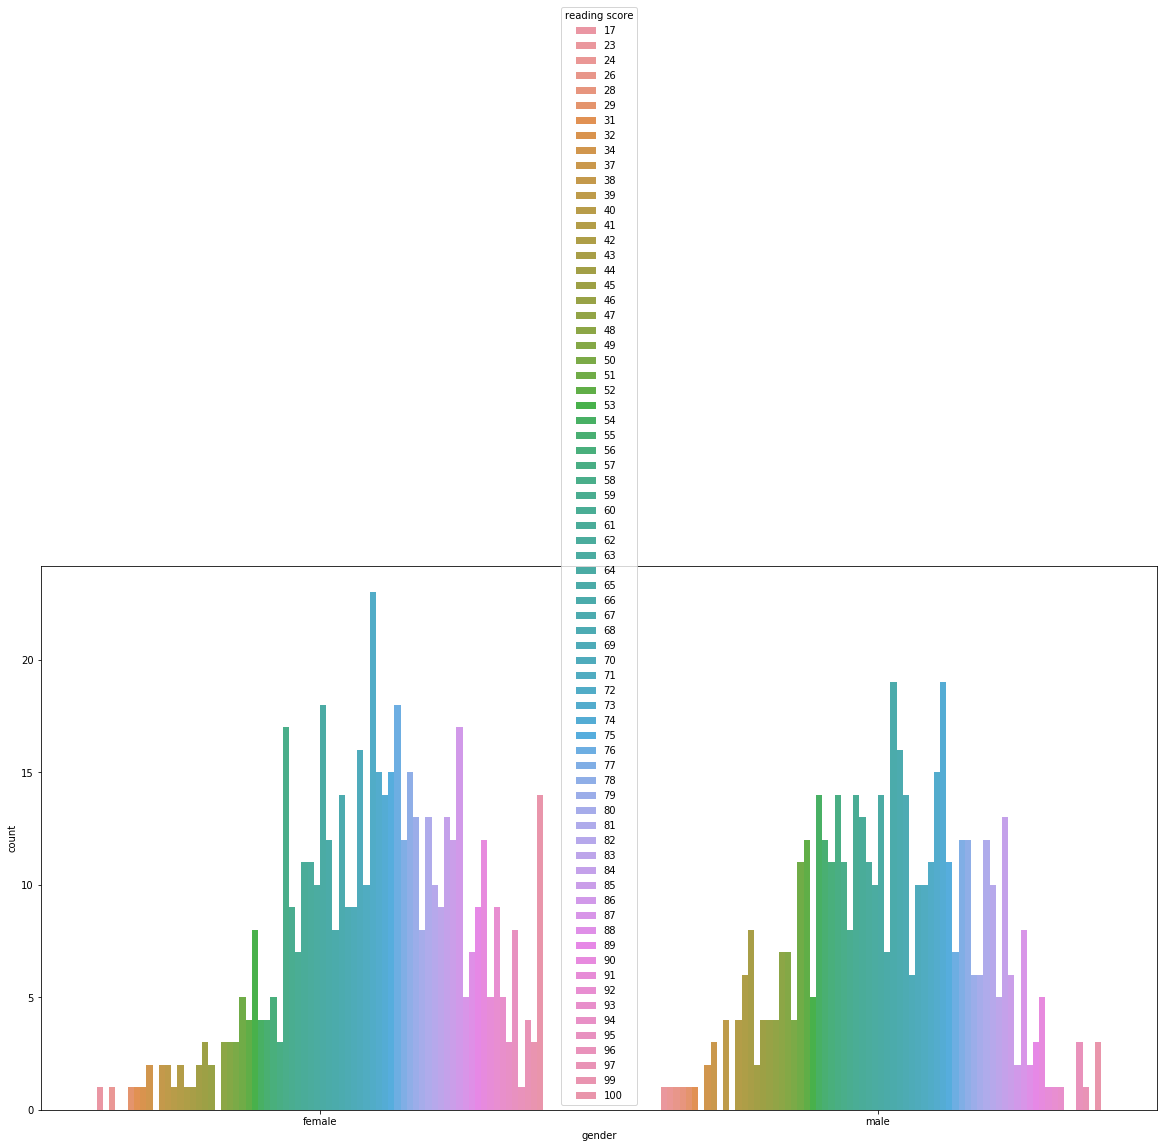

In [103]:
sns.countplot(x = 'gender', data = data,  hue = 'reading score')
plt.show()

### Conclusion --

From above graphs, we can conclude that male students performed better in maths as compared to female students while female students performed better in reading and writing as compared to male students.From the outliers in boxplot, we can say that few female students scored very low as comparison to boys. This was observed more significantly in maths scores.We can see that on an average female students performed better than male students.

## By Race/Ethnicity

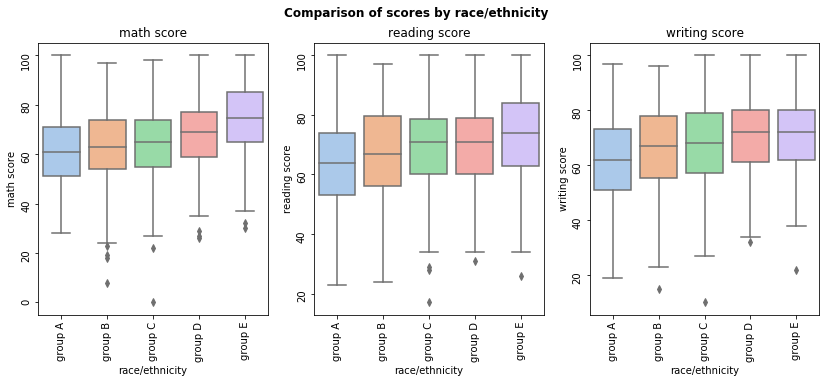

In [104]:
box(data,"race/ethnicity")

#### comparison between maths score and race/ethnicity

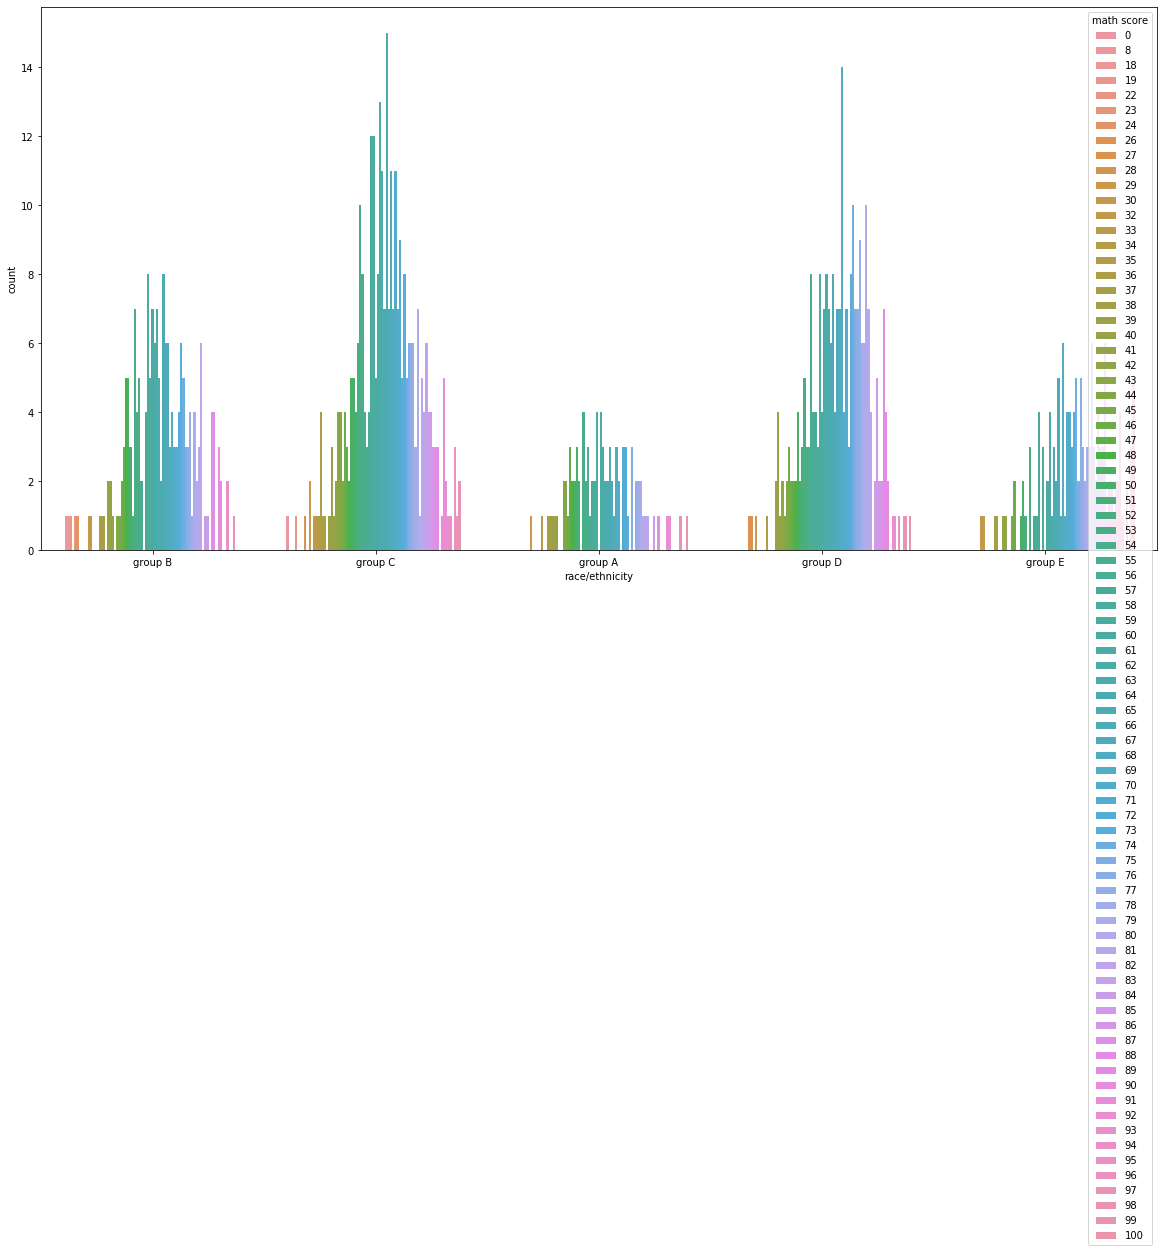

In [105]:
figure=sns.countplot(x = 'race/ethnicity', data = data,  hue = 'math score')
plt.show()

#### comparison between writing score and race/ethnicity

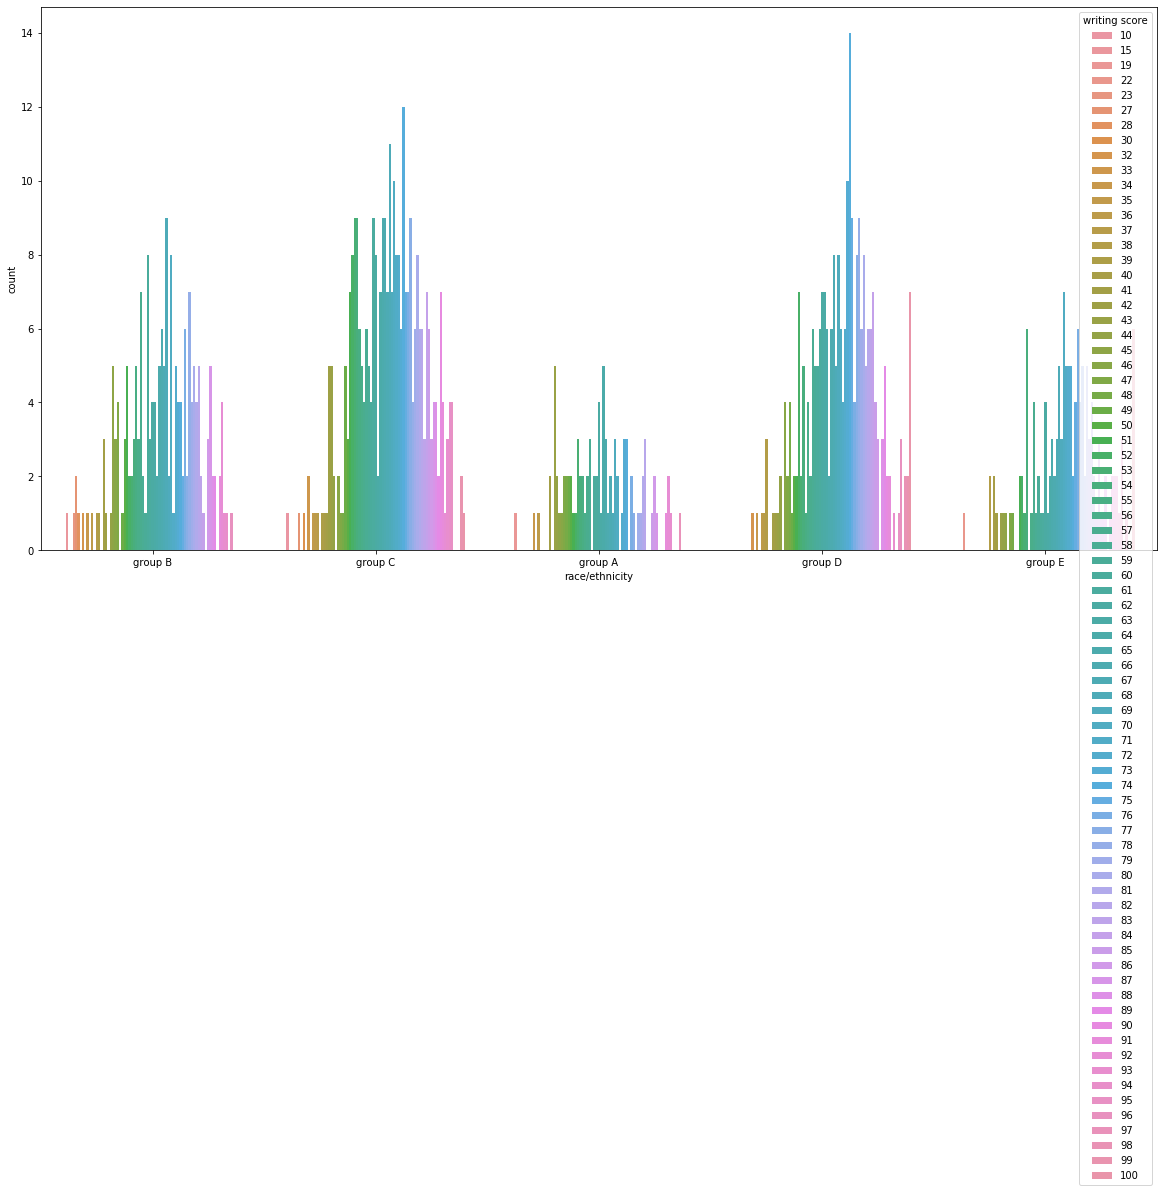

In [106]:
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'writing score')
plt.show()

#### comparison between reading score and race/ethnicity

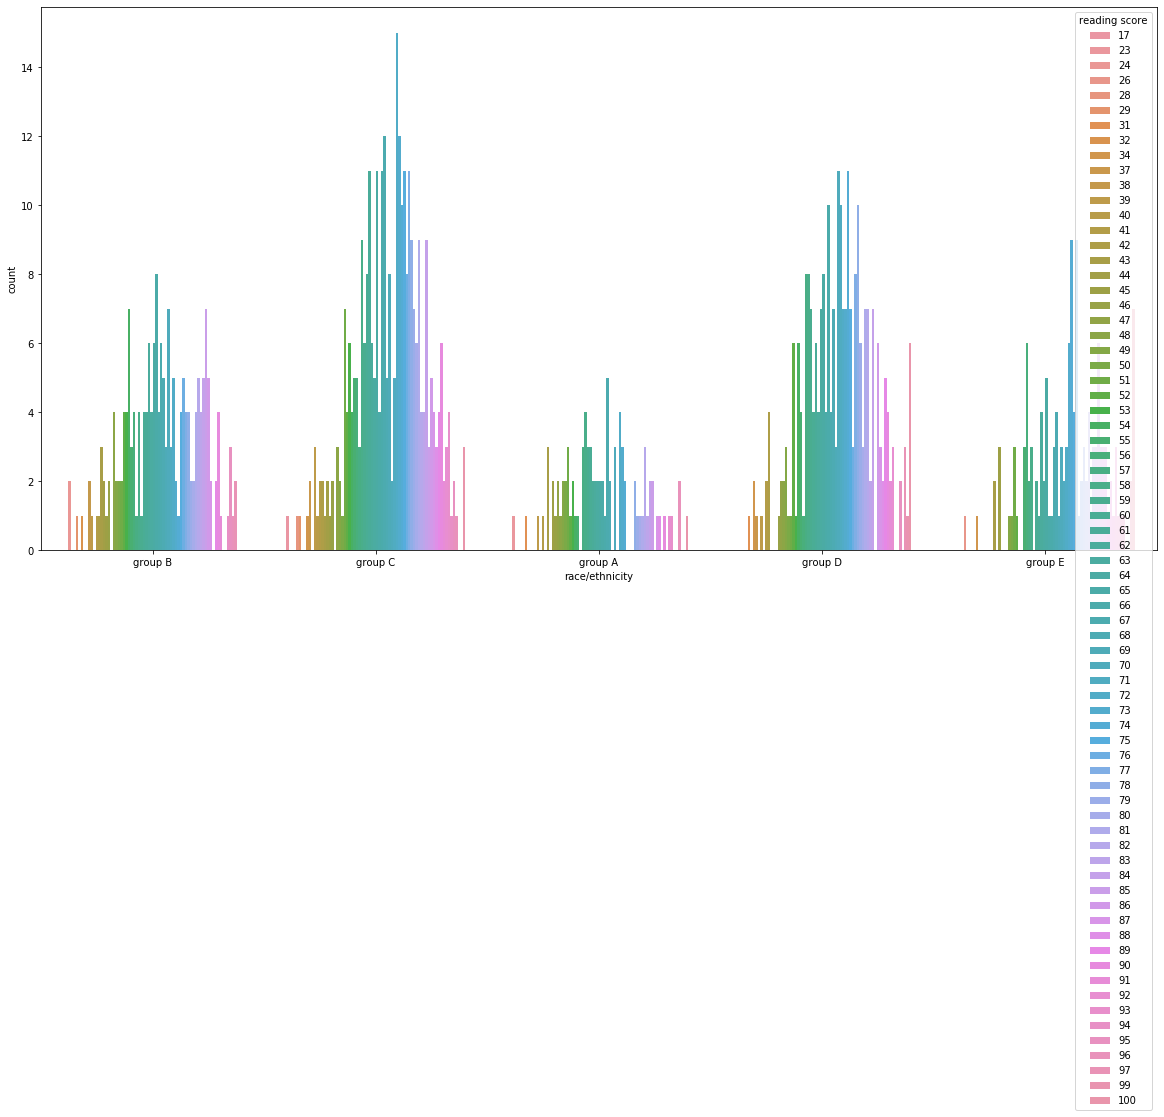

In [107]:
sns.countplot(x = 'race/ethnicity', data = data,  hue = 'reading score')
plt.show()

### Conclusion --

From graphs we can say that highest number of students belong to group C followed by group D and group B.From the graphs, we can say that in all the 3 scores group E (median marks was highest) performed the best whereas group A scored the least.
In math scores there is a trend of increase in scores from group A followed by group B, group C, group D,group E.
So we can say that highest group order students scored least maybe due to lesser efforts and least order group E performed best and is has most hardworking and motivated students.

## By Parental Level Of Education

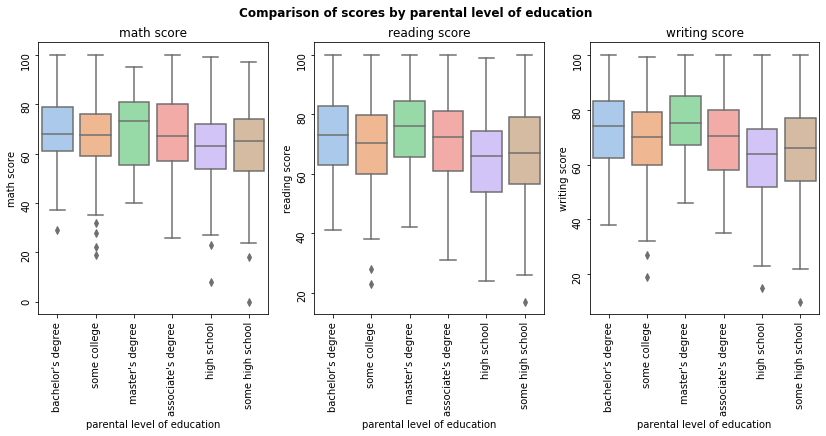

In [110]:
box(data, "parental level of education", sort_order=0)

#### comparison between maths score and parental level of education

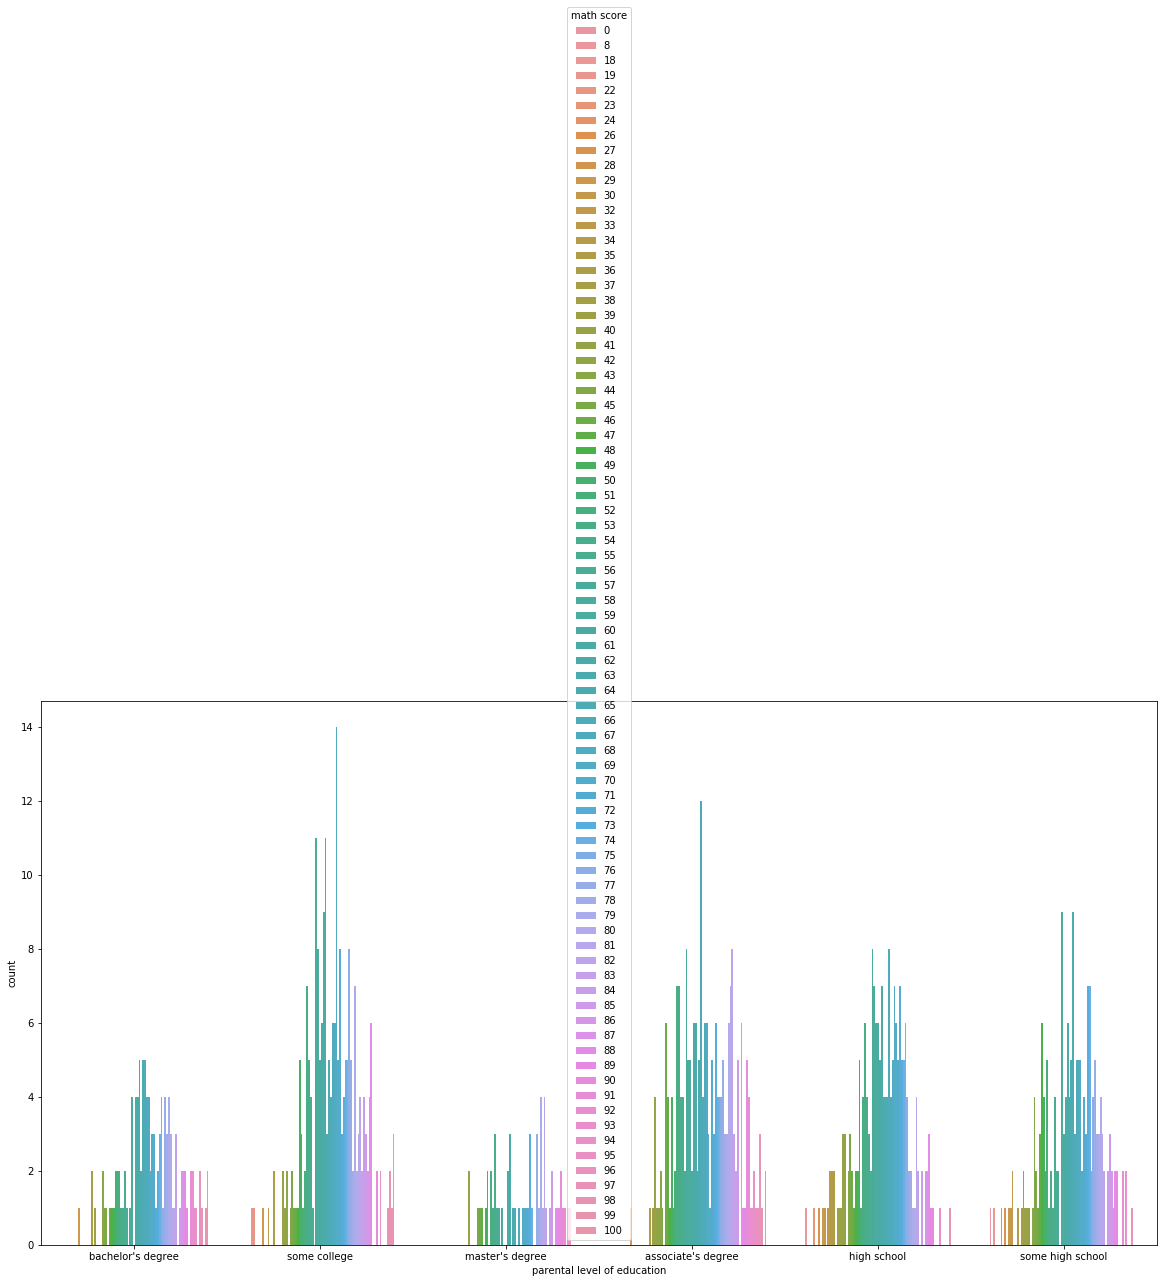

In [111]:
sns.countplot(x = 'parental level of education', data = data, hue = 'math score')
plt.show()

#### comparison between writing score and parental level of education

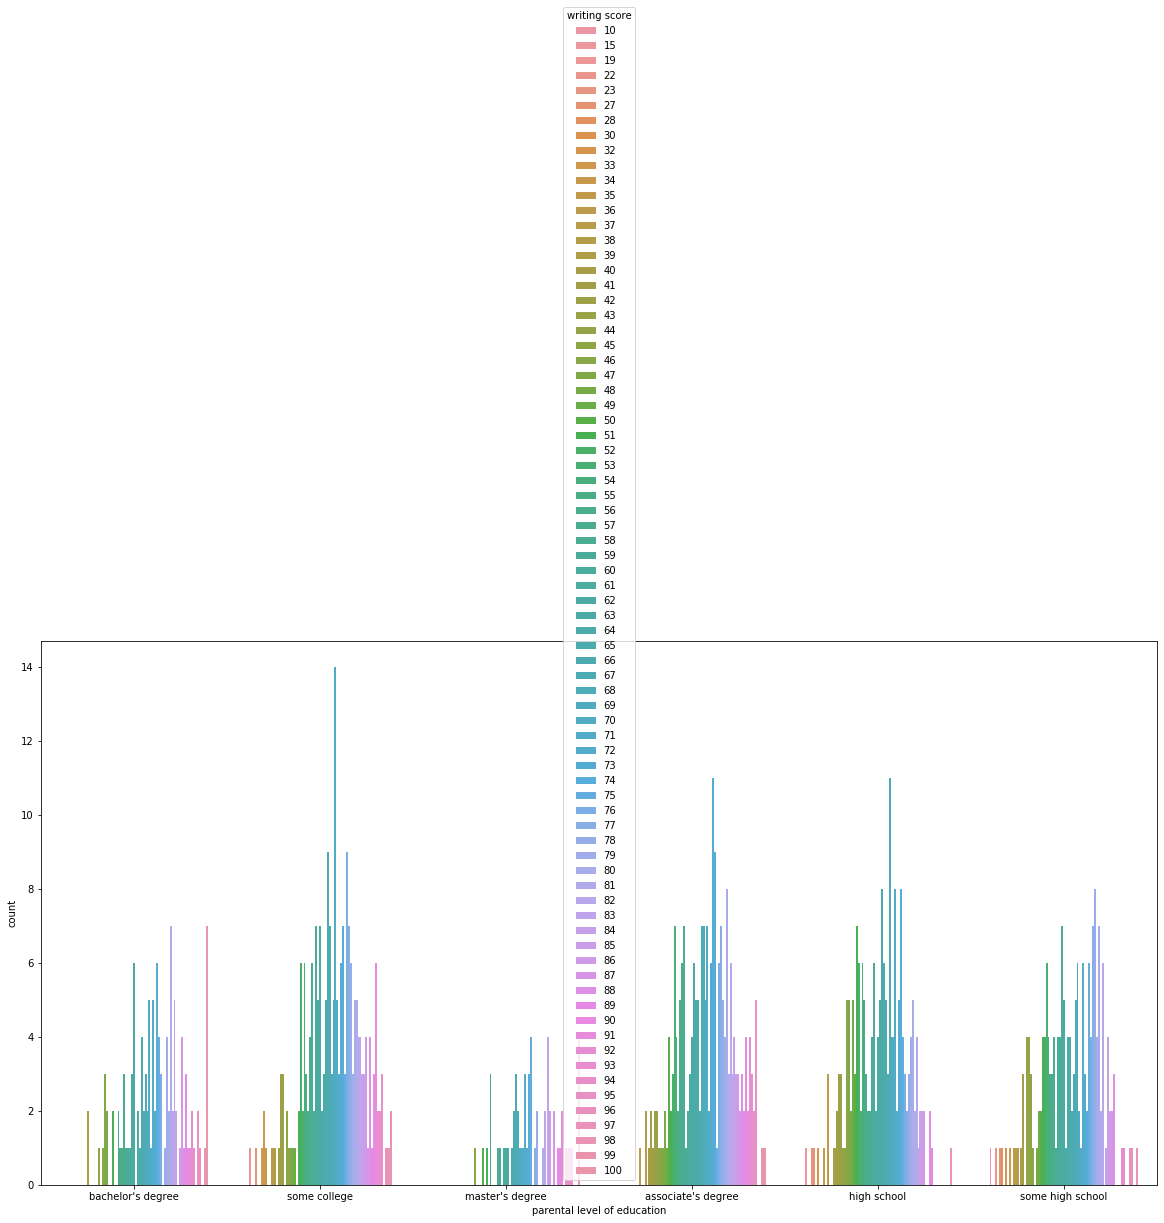

In [112]:
sns.countplot(x = 'parental level of education', data = data,  hue = 'writing score')
plt.show()

#### comparison of reading score and parental level of education

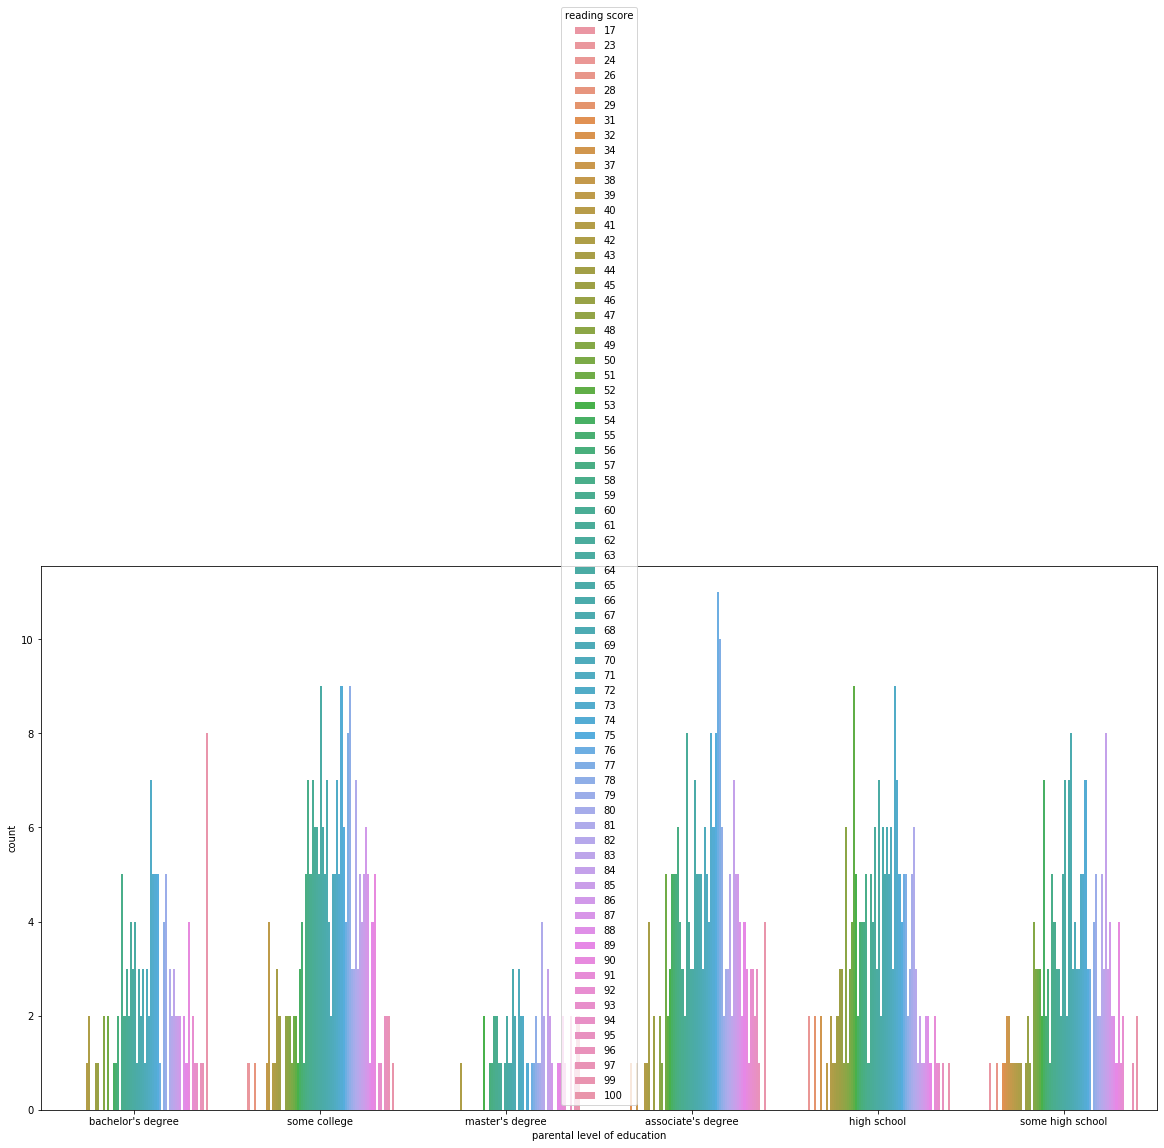

In [113]:
sns.countplot(x = 'parental level of education', data = data,  hue = 'reading score')
plt.show()

### Conclusion --

From the graph we can conclude that highest number of students have parents with a associate's degree or have attended some college whereas number of number of students with parents having a master's degree is the lowest.Highest marks are scored by students with parents having a master's degree followed by students with parents having a bachelors's degree.
The students whose parent's education is high school education only scored the least marks.So we can say that parents who have highest education keenly focus on their children and help them academically, we can say atleast high order learned parents focus on their children as they value education more than less learned parents.

## By Lunch

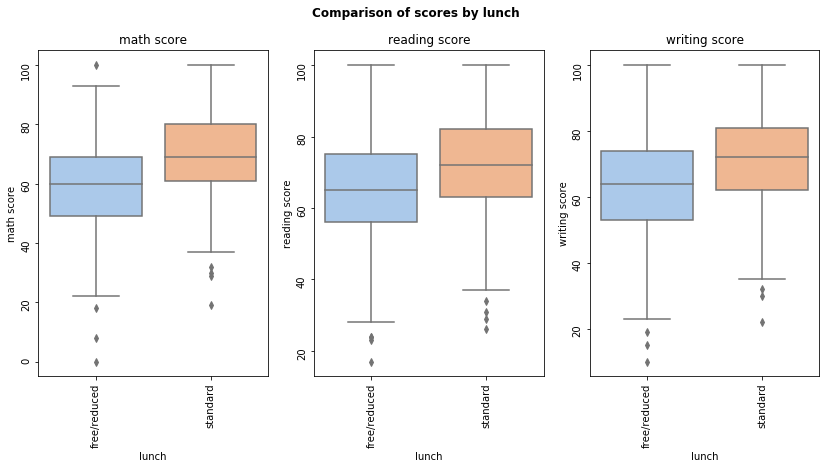

In [115]:
box(data,"lunch",fsize=(14,6))

#### comparison of maths score and lunch

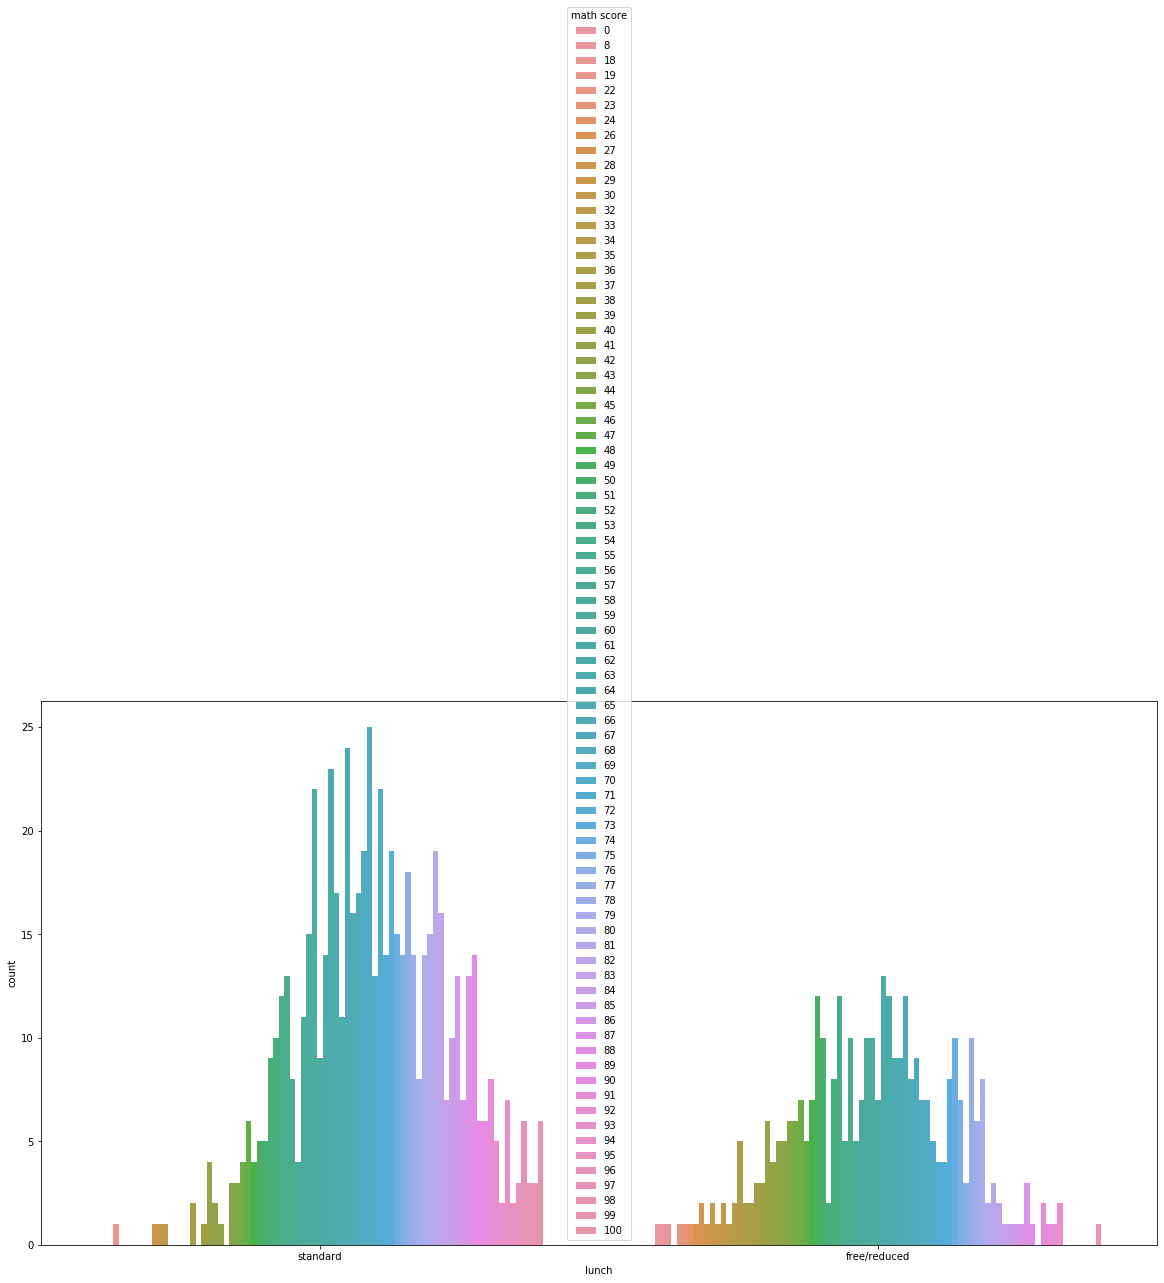

In [119]:
sns.countplot(x ='lunch', data = data,  hue = 'math score')
plt.show()

#### comparison of writing score and lunch

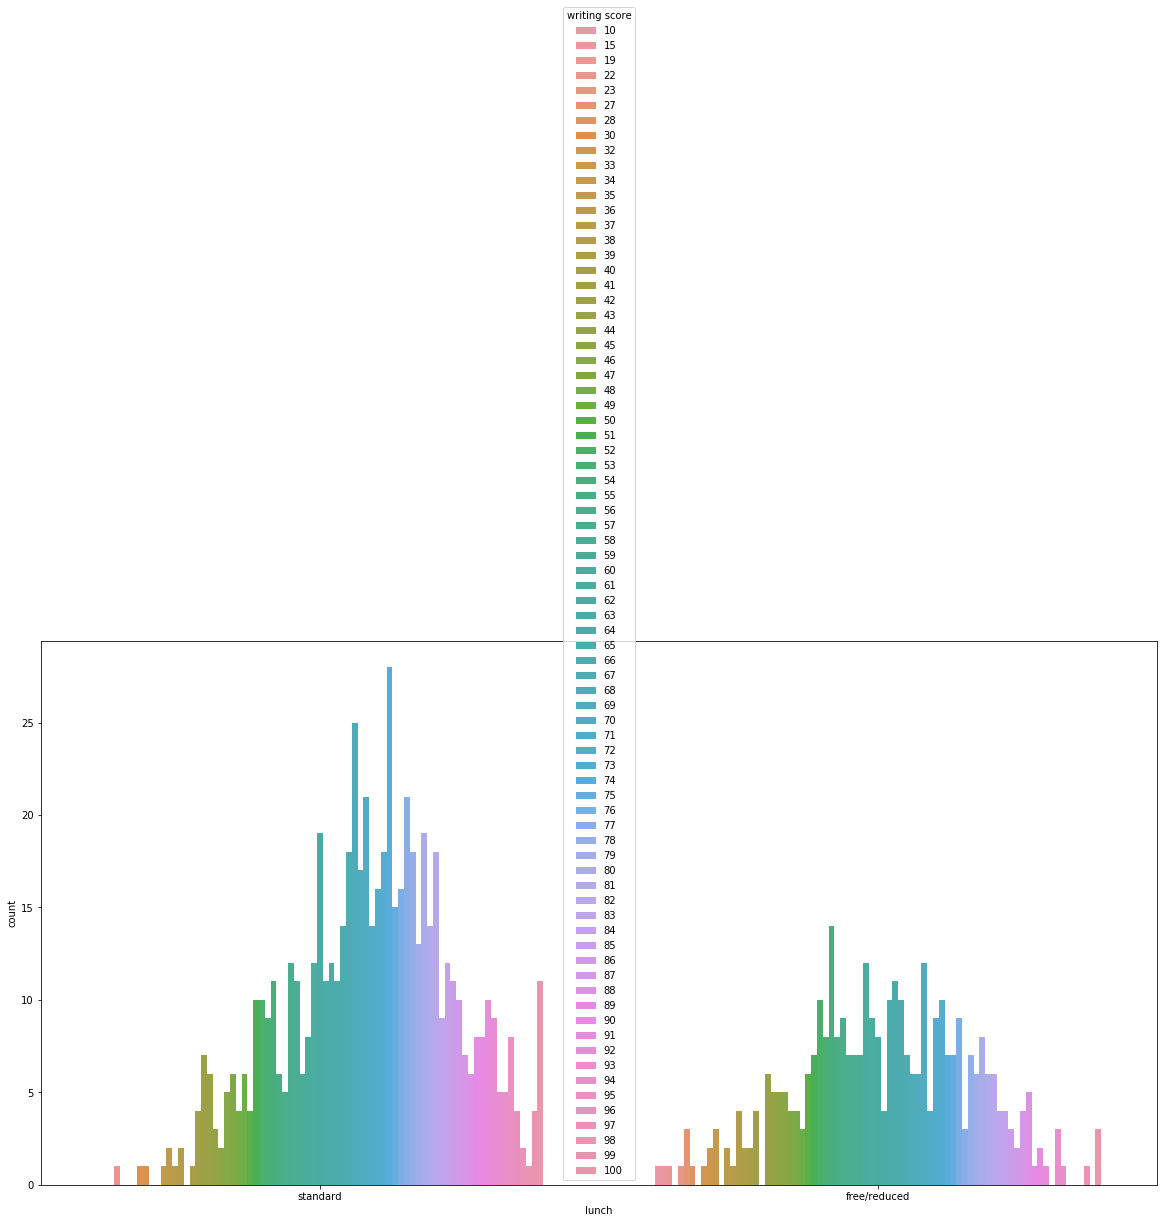

In [120]:
sns.countplot(x = 'lunch', data = data,  hue = 'writing score')
plt.show()

#### comparison of reading score and lunch

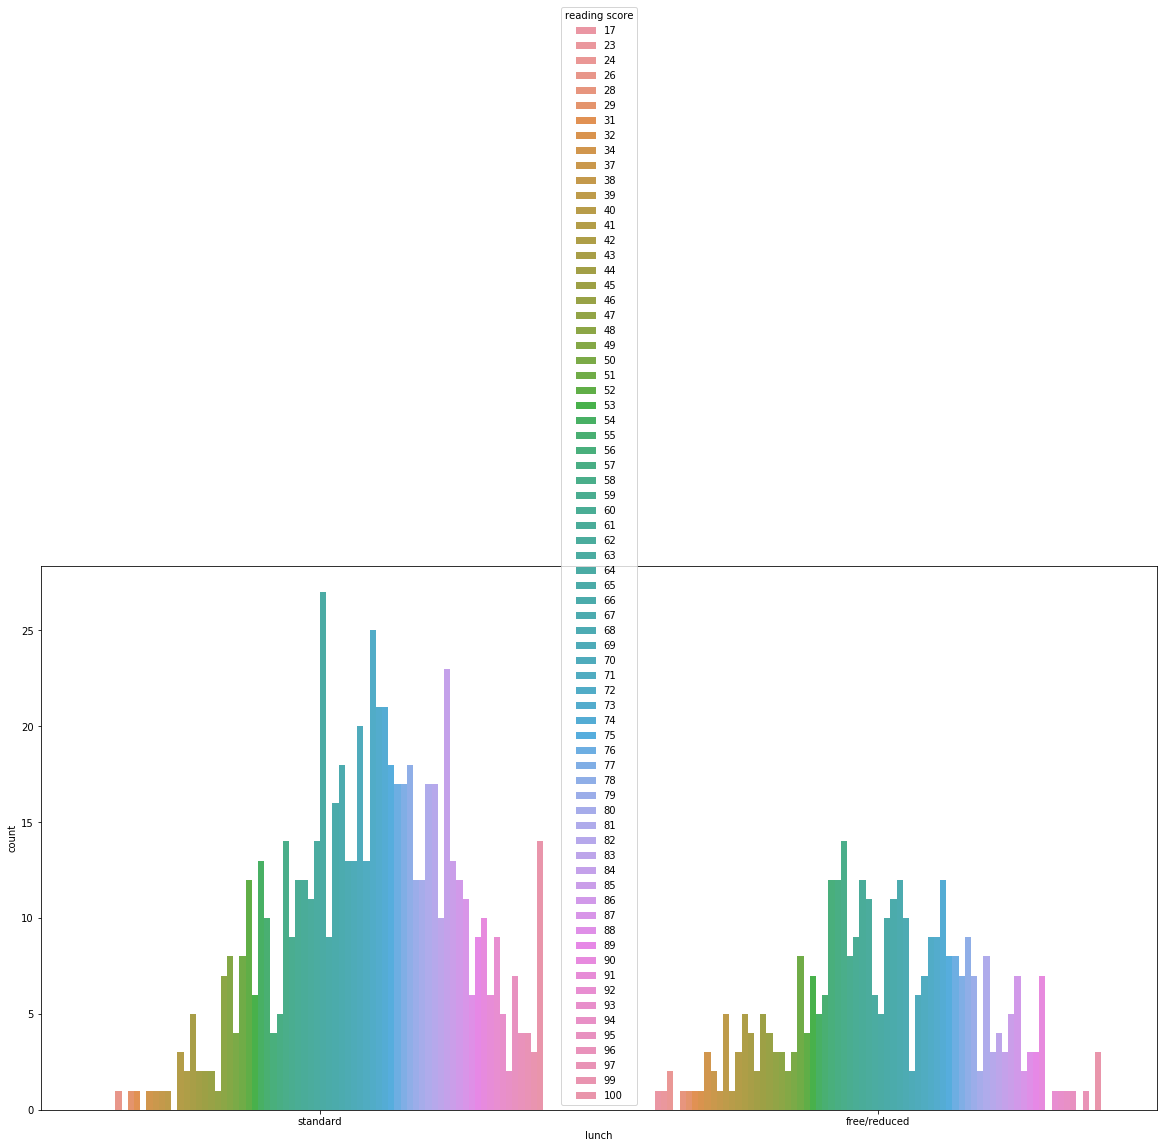

In [121]:
sns.countplot(x = 'lunch', data = data,  hue = 'reading score')
plt.show()

### Conclusion --

From the graphs we can say that almost two-thirds of students have standard lunch.The scores show that students with standard lunch have performed better. This is visible in all the three scores. Whereas the number of students with free/reduced lunch scored the least.So we can say that students should consume lunch for better mental health and high marks.

## By Test Preparation Course

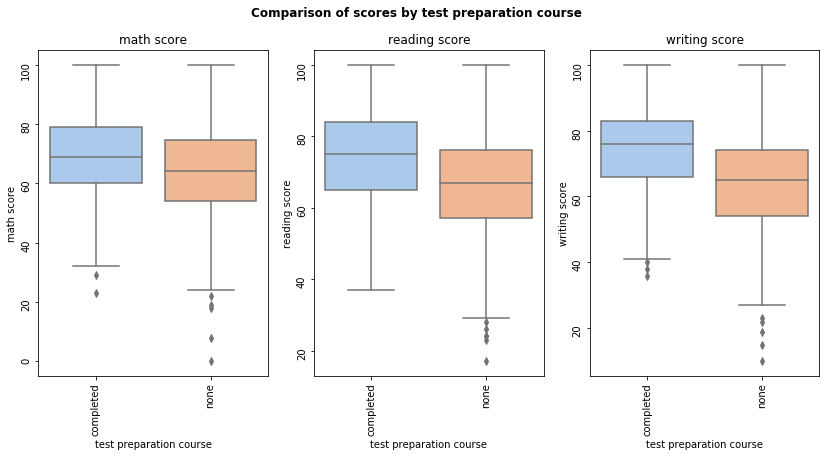

In [122]:
box(data,"test preparation course", fsize=(14,6))

#### comparison between maths score and test preparation course

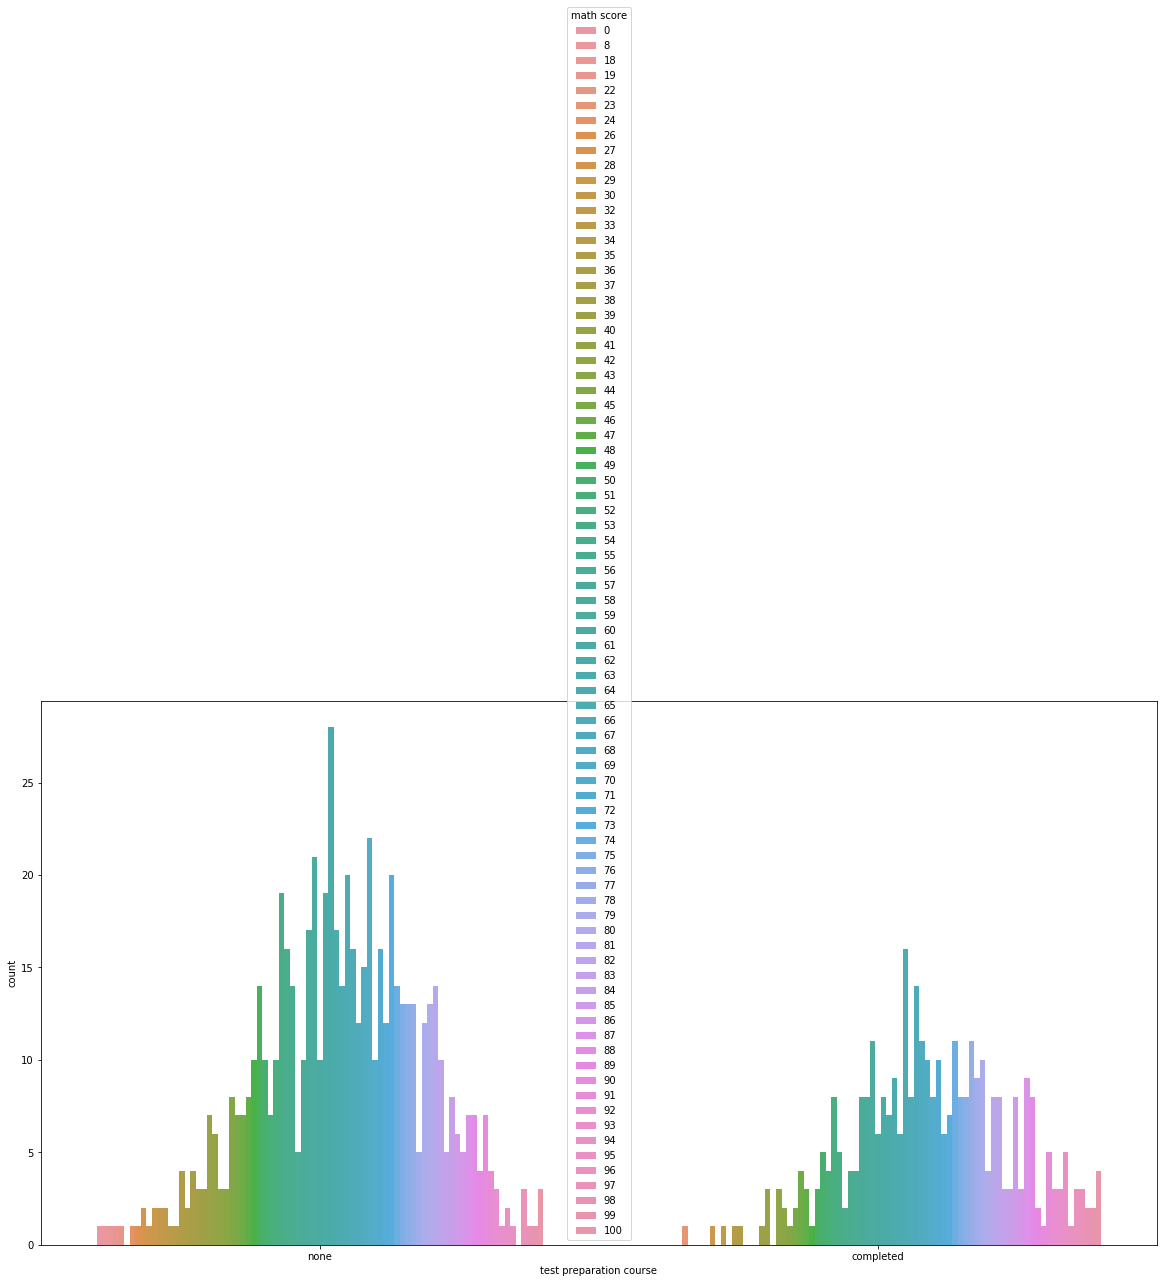

In [123]:
sns.countplot(x = 'test preparation course', data = data,  hue = 'math score')
plt.show()

#### comparison between writing score and test preparation course

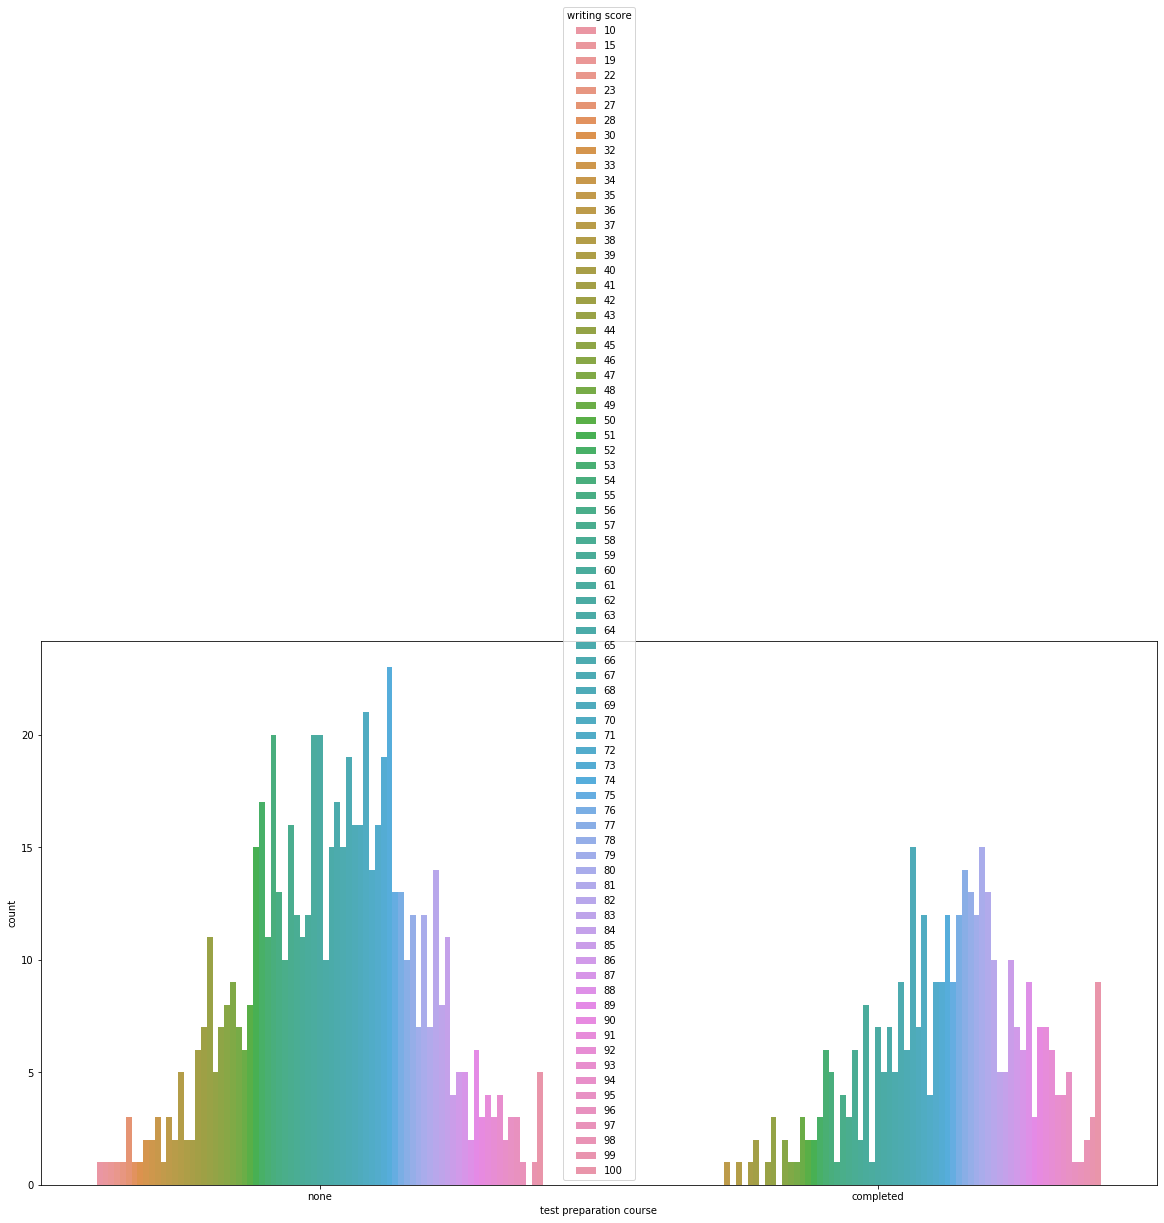

In [124]:
sns.countplot(x = 'test preparation course', data = data,  hue = 'writing score')
plt.show()

#### comparison between reading score and test preparation course

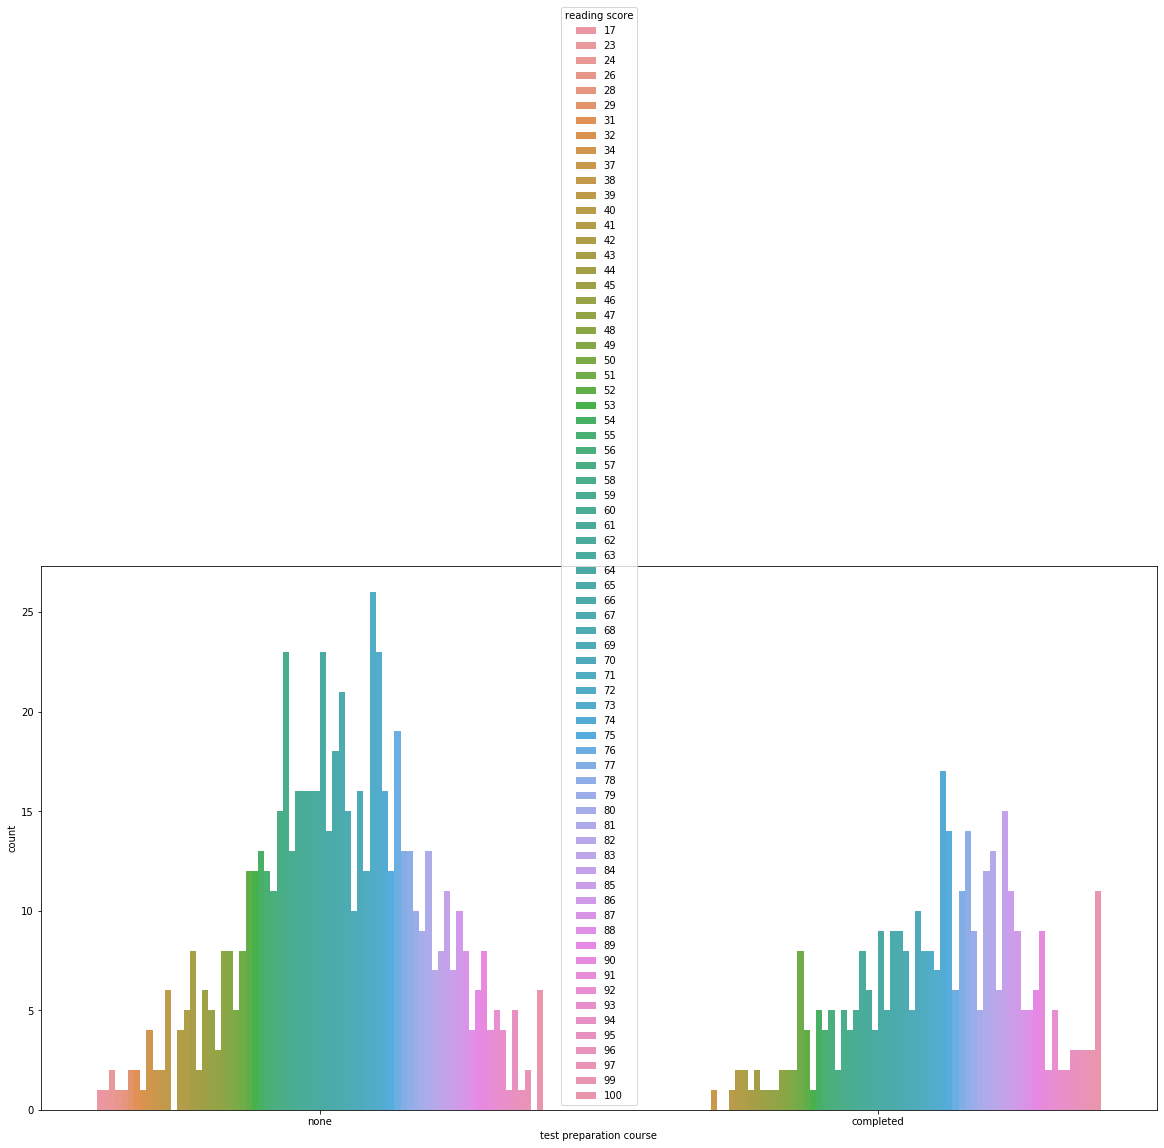

In [125]:
sns.countplot(x = 'test preparation course', data = data,  hue = 'reading score')
plt.show()

### Conclusion --

From the graphs we can say that one-thirds of students completed the test preparation course and it has benefitted the students for scoring high marks.These have performed better in all the three exams than the students who didn't complete any test preparation.But the number of students who did not have any test preparation courses is highest among those students who scored least. 

# Main Conclusion

In order to score highest marks in maths,reading and writing students should prefer standard type of lunch as it seems to benefit their mental health too.Parents of students should focus on the academics of their children,should keep a watch on their students academics and should help them academically as much as possible. Students too should stay motivated and focus on academics, they should learn from group E students especially group A students who seems to be least hardworker.For scoring high marks students should enroll and complete test preparation course.Male students should focus more on their reading and writing abilities and female students should focus more on their mathematical skills.